In [23]:
import pandas as pd
import numpy as np

In [24]:
index_for_df = ["p" + str(x) for x in range(9)]
index_for_df.append("next_move")
df = pd.read_csv('../games.csv').sample(frac=0.1)
df.columns = index_for_df
df.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,next_move
27811,0,0,0,0,0,0,1,-1,-1,4
41471,0,0,-1,0,-1,0,1,0,1,7
7000,0,0,0,0,0,0,0,-1,0,8
20729,0,0,0,0,0,-1,0,0,1,6
13818,0,0,0,0,0,0,1,-1,-1,4


In [25]:
def disclosure_to_vector(train:np.ndarray)-> np.ndarray:
    out = []
    for i in train:
        out.append(vector_representation(i, 9))
    return np.array(out, dtype=int)


def vector_representation(val, max_val:int=9) -> np.ndarray:
    out = np.zeros(max_val)
    out[val] = 1
    return out

In [26]:
y_train = disclosure_to_vector(df['next_move'].values)
x_train = df.drop(columns=['next_move']).values

In [27]:
y_train[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0])

In [28]:
from keras.models import Sequential, model_from_json
from keras.layers.core import Dense;
import tensorflow as tf

In [38]:
weights_file = 'weights.h5'
callback = tf.keras.callbacks.ModelCheckpoint(weights_file,
              monitor='accuracy',
              mode='max',
              save_best_only=True)

In [39]:
model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=9))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=9, activation='softmax'))

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [51]:
model.fit(x_train, y_train, epochs=100, batch_size=32, callbacks=[callback])

json_file = 'model.json'
model_json = model.to_json()

with open(json_file, 'w') as f:
  f.write(model_json)

Epoch 1/100
107/107 [==============================] - 1s 2ms/step - loss: 2.1474 - accuracy: 0.2587
Epoch 2/100
107/107 [==============================] - 0s 2ms/step - loss: 2.0865 - accuracy: 0.3096
Epoch 3/100
107/107 [==============================] - 0s 2ms/step - loss: 2.0403 - accuracy: 0.3274
Epoch 4/100
107/107 [==============================] - 0s 2ms/step - loss: 2.0011 - accuracy: 0.3116
Epoch 5/100
107/107 [==============================] - 0s 2ms/step - loss: 1.9674 - accuracy: 0.3215
Epoch 6/100
107/107 [==============================] - 0s 2ms/step - loss: 1.9362 - accuracy: 0.3186
Epoch 7/100
107/107 [==============================] - 0s 2ms/step - loss: 1.9047 - accuracy: 0.3344
Epoch 8/100
107/107 [==============================] - 0s 2ms/step - loss: 1.8729 - accuracy: 0.3633
Epoch 9/100
107/107 [==============================] - 0s 2ms/step - loss: 1.8412 - accuracy: 0.3669
Epoch 10/100
107/107 [==============================] - 0s 2ms/step - loss: 1.8086 - accura

In [52]:
pred_test = model.predict(x_train)

107/107 [==============================] - 0s 1ms/step


In [53]:
pred_y = [np.argmax(x) for x in pred_test]
print(sum(pred_y == df['next_move'].values) / len(pred_y))

0.8935983630517392


## Блок дообучения модели

In [47]:
json_file = 'model.json'
model_json = model.to_json()

with open(json_file, 'w') as f:
  f.write(model_json)

In [48]:
with open('model.json', 'r') as f:
  loaded_model = model_from_json(f.read())

In [49]:
loaded_model.load_weights('weights.h5')

In [50]:
test = np.array([x_train[0]])
predict = loaded_model.predict(test, verbose=0)
print(predict)

[[1.1632091e-02 1.3612054e-02 3.6375619e-02 3.3289235e-02 8.7821311e-01
  2.4627829e-02 3.4256501e-04 1.7405733e-03 1.6688312e-04]]


In [51]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [65]:
loaded_model.fit(x_train, y_train, epochs=100, batch_size=32, callbacks=[callback])

json_file = 'model.json'
model_json = model.to_json()

with open(json_file, 'w') as f:
  f.write(model_json)

Epoch 1/100
280/280 [==============================] - 1s 2ms/step - loss: 0.7877 - accuracy: 0.7977
Epoch 2/100
280/280 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.8544
Epoch 3/100
280/280 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.8683
Epoch 4/100
280/280 [==============================] - 1s 2ms/step - loss: 0.4932 - accuracy: 0.8779
Epoch 5/100
280/280 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.8851
Epoch 6/100
280/280 [==============================] - 1s 2ms/step - loss: 0.4414 - accuracy: 0.8898
Epoch 7/100
280/280 [==============================] - 1s 2ms/step - loss: 0.4248 - accuracy: 0.8946
Epoch 8/100
280/280 [==============================] - 1s 2ms/step - loss: 0.4112 - accuracy: 0.8975
Epoch 9/100
280/280 [==============================] - 1s 2ms/step - loss: 0.3991 - accuracy: 0.8994
Epoch 10/100
280/280 [==============================] - 1s 2ms/step - loss: 0.3882 - accura

### Тест визуала

In [41]:
history =  model.fit(x_train, y_train, epochs=200, batch_size=32, callbacks=[callback])

Epoch 1/200
157/157 [==============================] - 1s 2ms/step - loss: 2.1457 - accuracy: 0.2460
Epoch 2/200
157/157 [==============================] - 0s 2ms/step - loss: 2.0354 - accuracy: 0.3315
Epoch 3/200
157/157 [==============================] - 0s 2ms/step - loss: 1.9511 - accuracy: 0.4083
Epoch 4/200
157/157 [==============================] - 0s 2ms/step - loss: 1.8714 - accuracy: 0.4363
Epoch 5/200
157/157 [==============================] - 0s 2ms/step - loss: 1.7912 - accuracy: 0.4435
Epoch 6/200
157/157 [==============================] - 0s 2ms/step - loss: 1.7176 - accuracy: 0.4599
Epoch 7/200
157/157 [==============================] - 0s 2ms/step - loss: 1.6519 - accuracy: 0.4698
Epoch 8/200
157/157 [==============================] - 0s 2ms/step - loss: 1.5934 - accuracy: 0.4768
Epoch 9/200
157/157 [==============================] - 0s 2ms/step - loss: 1.5393 - accuracy: 0.4870
Epoch 10/200
157/157 [==============================] - 0s 2ms/step - loss: 1.4882 - accura

In [42]:
from keras.utils import plot_model

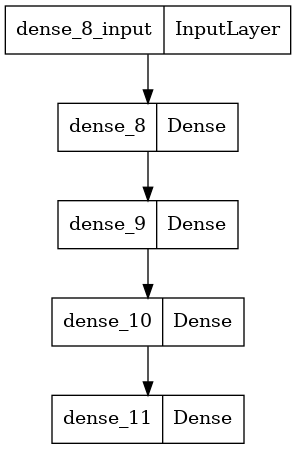

In [43]:
plot_model(model, to_file='model.png')

In [44]:
import matplotlib.pyplot as plt

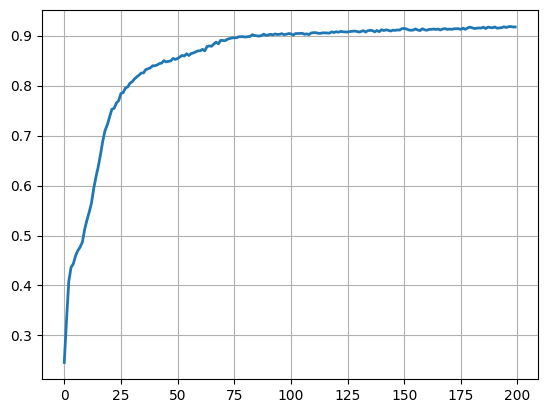

In [45]:
fig, ax = plt.subplots()
ax.plot(history.epoch, history.history['accuracy'], linewidth=2.0)
plt.grid()